In [ ]:
# pip install matplotlib pandas  numpy seaborn

Note: you may need to restart the kernel to use updated packages.


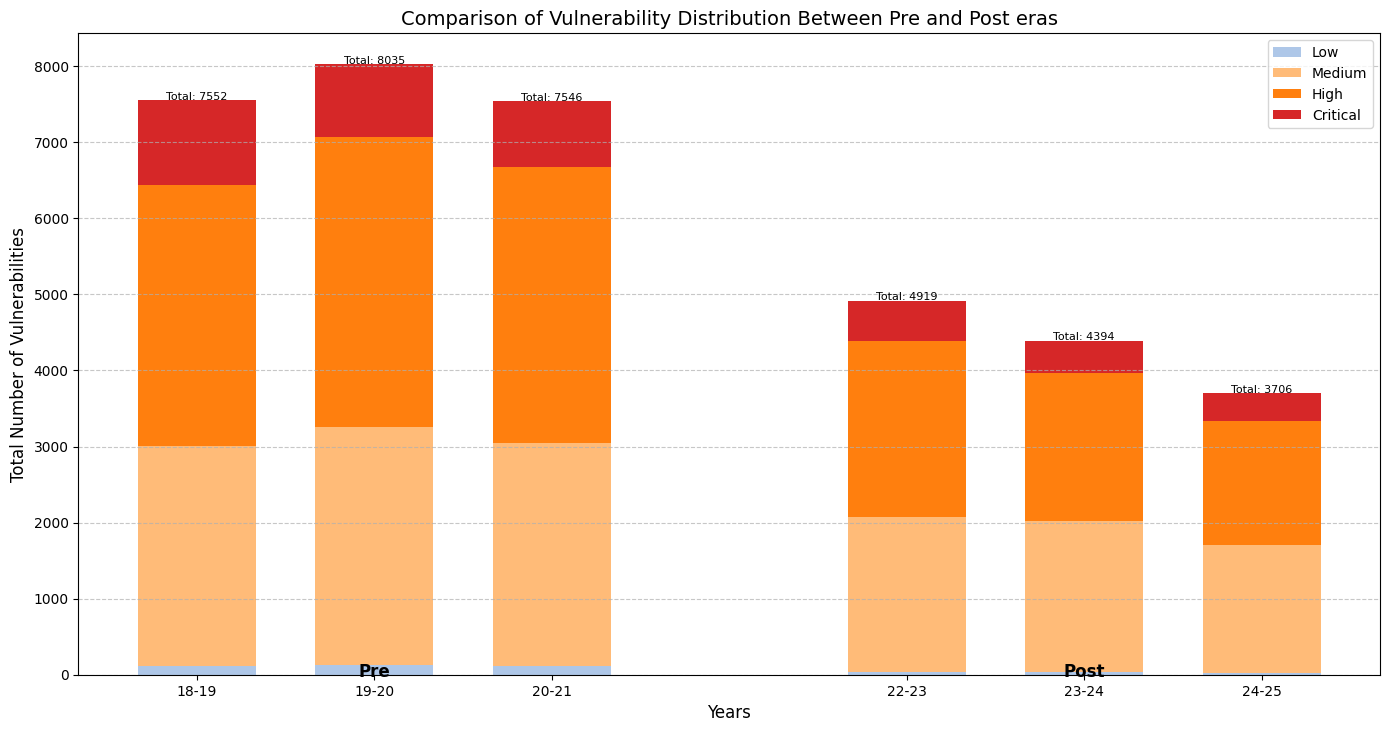

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the CSV files
pre_files = ['filtered data/pre_2019.csv', 'filtered data/pre_2020.csv', 'filtered data/pre_2021.csv']
post_files = ['filtered data/post_2023.csv', 'filtered data/post_2024.csv', 'filtered data/post_2025.csv']

pre_dfs = [pd.read_csv(file) for file in pre_files]
post_dfs = [pd.read_csv(file) for file in post_files]

# Function to calculate severity totals for a dataframe
def calculate_severity_totals(df):
    return {
        'critical': df['criticalSeverityCount'].sum(),
        'high': df['highSeverityCount'].sum(),
        'medium': df['mediumSeverityCount'].sum(),
        'low': df['lowSeverityCount'].sum()
    }

# Calculate totals for each dataset
pre_totals = [calculate_severity_totals(df) for df in pre_dfs]
post_totals = [calculate_severity_totals(df) for df in post_dfs]

# Create figure and axis
plt.figure(figsize=(14, 8))

# Set up the bar width and spacing - MUCH thinner bars and smaller gap
bar_width = 0.02  # Very thin bars
gap = 0.03  # Smaller gap between pre and post groups
spacing_multiplier = 1.5  # More space between bars within groups for better visibility

# Calculate x positions for pre and post bars
pre_positions = np.arange(len(pre_files)) * (bar_width * spacing_multiplier)
post_positions = np.arange(len(post_files)) * (bar_width * spacing_multiplier) + (len(pre_files) * bar_width * spacing_multiplier) + gap

# Define colors and severity order (reversed to have low at the bottom)
colors = {'low': '#aec7e8', 'medium': '#ffbb78', 'high': '#ff7f0e', 'critical': '#d62728'}
severities = ['low', 'medium', 'high', 'critical']  # Reversed order

# Create legend handles and labels before plotting
legend_handles = []
legend_labels = []

# Create stacked bars for pre data
for i, position in enumerate(pre_positions):
    bottom = 0
    for severity in severities:
        bar = plt.bar(position, pre_totals[i][severity], bar_width, bottom=bottom, color=colors[severity])
        
        # Only add to legend handles on the first bar of the first group
        if i == 0:
            legend_handles.append(bar)
            legend_labels.append(severity.capitalize())
        
        bottom += pre_totals[i][severity]
    
    # Add total as text on top of each bar
    total = sum(pre_totals[i].values())
    plt.text(position, total + 5, f'Total: {total}', ha='center', fontsize=8)

# Create stacked bars for post data
for i, position in enumerate(post_positions):
    bottom = 0
    for severity in severities:
        plt.bar(position, post_totals[i][severity], bar_width, bottom=bottom, color=colors[severity])
        bottom += post_totals[i][severity]
    
    # Add total as text on top of each bar
    total = sum(post_totals[i].values())
    plt.text(position, total + 5, f'Total: {total}', ha='center', fontsize=8)

# Add labels, title and legend
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Number of Vulnerabilities', fontsize=12)
plt.title('Comparison of Vulnerability Distribution Between Pre and Post eras', fontsize=14)

# Set x-tick positions and labels
all_positions = np.concatenate([pre_positions, post_positions])
all_labels = ['18-19', '19-20', '20-21', '22-23', '23-24', '24-25']
plt.xticks(all_positions, all_labels)

# Add group labels
plt.text(np.mean(pre_positions), -30, 'Pre', ha='center', fontsize=12, fontweight='bold')
plt.text(np.mean(post_positions), -30, 'Post', ha='center', fontsize=12, fontweight='bold')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend manually using the collected handles and labels
plt.legend(legend_handles, legend_labels, loc='upper right')

# Show the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the "Pre" and "Post" labels
plt.show()

# Optional: Save the figure
# plt.savefig('vulnerability_comparison.png', dpi=300, bbox_inches='tight')

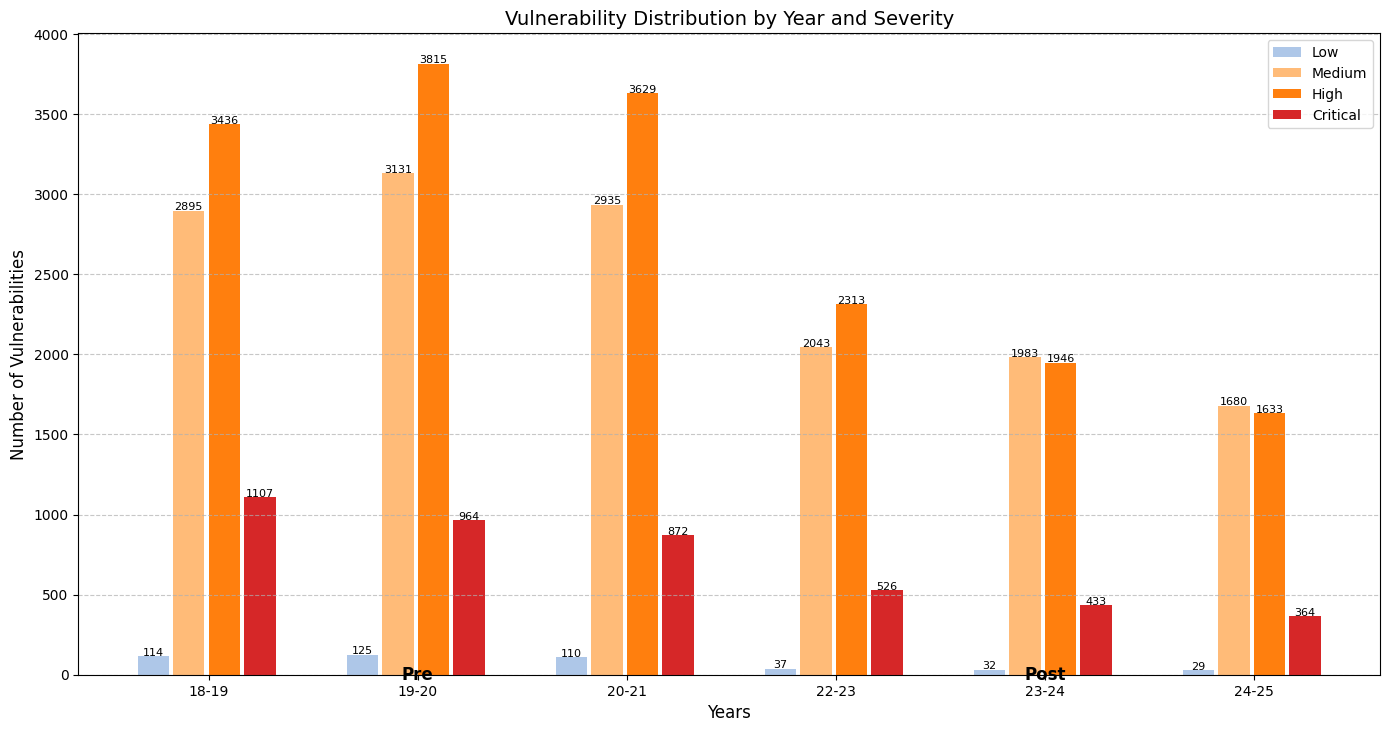

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the CSV files
pre_files = ['filtered data/pre_2019.csv', 'filtered data/pre_2020.csv', 'filtered data/pre_2021.csv']
post_files = ['filtered data/post_2023.csv', 'filtered data/post_2024.csv', 'filtered data/post_2025.csv']

pre_dfs = [pd.read_csv(file) for file in pre_files]
post_dfs = [pd.read_csv(file) for file in post_files]

# Function to calculate severity totals for a dataframe
def calculate_severity_totals(df):
    return {
        'critical': df['criticalSeverityCount'].sum(),
        'high': df['highSeverityCount'].sum(),
        'medium': df['mediumSeverityCount'].sum(),
        'low': df['lowSeverityCount'].sum()
    }

# Calculate totals for each dataset
pre_totals = [calculate_severity_totals(df) for df in pre_dfs]
post_totals = [calculate_severity_totals(df) for df in post_dfs]

# Combine all years data
all_years = ['18-19', '19-20', '20-21', '22-23', '23-24', '24-25']
all_totals = pre_totals + post_totals

# Create figure and axis
plt.figure(figsize=(14, 8))

# Set up the bar width and positions
bar_width = 0.15  # Width of each severity bar
gap = 0.02  # Gap between bars within a year group

# Define colors and severity order
colors = {'low': '#aec7e8', 'medium': '#ffbb78', 'high': '#ff7f0e', 'critical': '#d62728'}
severities = ['low', 'medium', 'high', 'critical']

# Calculate x positions for each year and severity
x_positions = np.arange(len(all_years))  # Center positions for each year group

# Plot bars for each severity side by side for each year
for i, severity in enumerate(severities):
    # Calculate offset for each severity bar within a year group
    offset = (i - len(severities)/2) * (bar_width + gap) + bar_width/2
    # Get values for this severity across all years
    values = [year_data[severity] for year_data in all_totals]
    plt.bar(x_positions + offset, values, bar_width, 
            label=severity.capitalize(), color=colors[severity])
    
    # Add value labels on top of each bar
    for x, val in zip(x_positions + offset, values):
        if val > 0:  # Only label if value is greater than 0
            plt.text(x, val + 5, str(val), ha='center', fontsize=8)

# Add labels, title and legend
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Vulnerabilities', fontsize=12)
plt.title('Vulnerability Distribution by Year and Severity', fontsize=14)

# Set x-tick positions and labels
plt.xticks(x_positions, all_years)

# Add group labels
plt.text(np.mean(x_positions[:3]), -30, 'Pre', ha='center', fontsize=12, fontweight='bold')
plt.text(np.mean(x_positions[3:]), -30, 'Post', ha='center', fontsize=12, fontweight='bold')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the "Pre" and "Post" labels
plt.show()

# Optional: Save the figure
# plt.savefig('vulnerability_comparison_side_by_side.png', dpi=300, bbox_inches='tight')

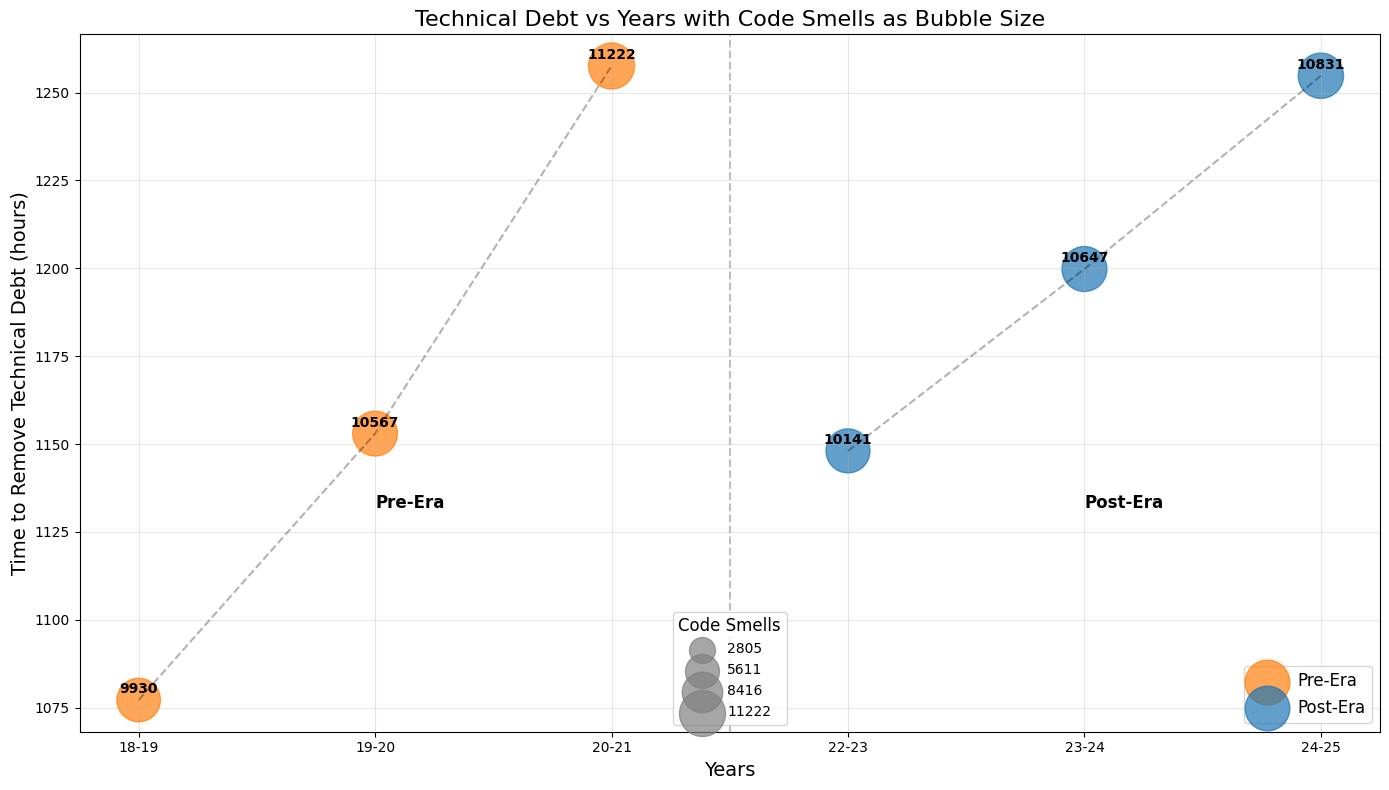

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the CSV files
pre_files = ['filtered data/pre_2019.csv', 'filtered data/pre_2020.csv', 'filtered data/pre_2021.csv']
post_files = ['filtered data/post_2023.csv', 'filtered data/post_2024.csv', 'filtered data/post_2025.csv']

all_files = pre_files + post_files
all_years = ['18-19', '19-20', '20-21', '22-23', '23-24', '24-25']  # Labels for the years

# Initialize arrays to store data
code_smells = []
debt_time = []

# Process each file
for file in all_files:
    df = pd.read_csv(file)
    
    # Calculate sum of numberOfCodeSmells for this dataset
    total_code_smells = df['numberOfCodeSmells'].sum()
    code_smells.append(total_code_smells)
    
    # Calculate sum of totalTimeNeededToRemoveDebts_mins for this dataset
    total_debt_time = df['totalTimeNeededToRemoveDebts_mins'].sum() / 60  # Convert to hours
    debt_time.append(total_debt_time)

# Create numeric x positions for years
x_positions = np.arange(len(all_years))

# Create figure and axis
plt.figure(figsize=(14, 8))

# Calculate bubble sizes (scale code smells to reasonable bubble sizes)
# Find the scaling factor that makes the bubbles visually appropriate
max_code_smells = max(code_smells)
base_size = 100  # Base size for scaling
bubble_sizes = [size / max_code_smells * 1000 + base_size for size in code_smells]

# Split data into pre and post for different colors
pre_x = x_positions[:3]
pre_y = debt_time[:3]
pre_sizes = bubble_sizes[:3]
pre_smells = code_smells[:3]

post_x = x_positions[3:]
post_y = debt_time[3:]
post_sizes = bubble_sizes[3:]
post_smells = code_smells[3:]

# Plot bubbles
pre_bubbles = plt.scatter(pre_x, pre_y, s=pre_sizes, c='#ff7f0e', alpha=0.7, label='Pre-Era')
post_bubbles = plt.scatter(post_x, post_y, s=post_sizes, c='#1f77b4', alpha=0.7, label='Post-Era')

# Add labels to bubbles
for i, (x, y, smell) in enumerate(zip(x_positions, debt_time, code_smells)):
    plt.annotate(f'{smell}', (x, y), 
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 fontsize=10,
                 fontweight='bold')

# Add connecting lines to show progression
plt.plot(pre_x, pre_y, 'k--', alpha=0.3)
plt.plot(post_x, post_y, 'k--', alpha=0.3)

# Set labels and title
plt.xlabel('Years', fontsize=14)
plt.ylabel('Time to Remove Technical Debt (hours)', fontsize=14)
plt.title('Technical Debt vs Years with Code Smells as Bubble Size', fontsize=16)

# Set x-axis ticks to year labels
plt.xticks(x_positions, all_years)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add a legend for pre/post eras and position it at the lower right
era_legend = plt.legend(fontsize=12, loc='lower right')

# Add a vertical line to separate pre and post
plt.axvline(x=2.5, color='gray', linestyle='--', alpha=0.5)

# Add annotation for pre and post eras
plt.annotate('Pre-Era', xy=(1.0, max(debt_time) * 0.9), 
             xytext=(1.0, max(debt_time) * 0.9),
             fontsize=12, fontweight='bold')
             
plt.annotate('Post-Era', xy=(4.0, max(debt_time) * 0.9), 
             xytext=(4.0, max(debt_time) * 0.9),
             fontsize=12, fontweight='bold')

# Add the first legend back to the plot
plt.gca().add_artist(era_legend)

# Create a legend for size
sizes = [0.25 * max_code_smells, 0.5 * max_code_smells, 0.75 * max_code_smells, max_code_smells]
labels = [f"{int(size)}" for size in sizes]

# Create fake scatter points just for the legend
legend_bubbles = []
for size in sizes:
    size_scaled = size / max_code_smells * 1000 + base_size
    legend_bubbles.append(plt.scatter([], [], s=size_scaled, color='gray', alpha=0.7))

# Add second legend for size reference, positioned at the lower center
plt.legend(legend_bubbles, labels, 
           scatterpoints=1,
           loc='lower center',
           title='Code Smells',
           frameon=True,
           title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

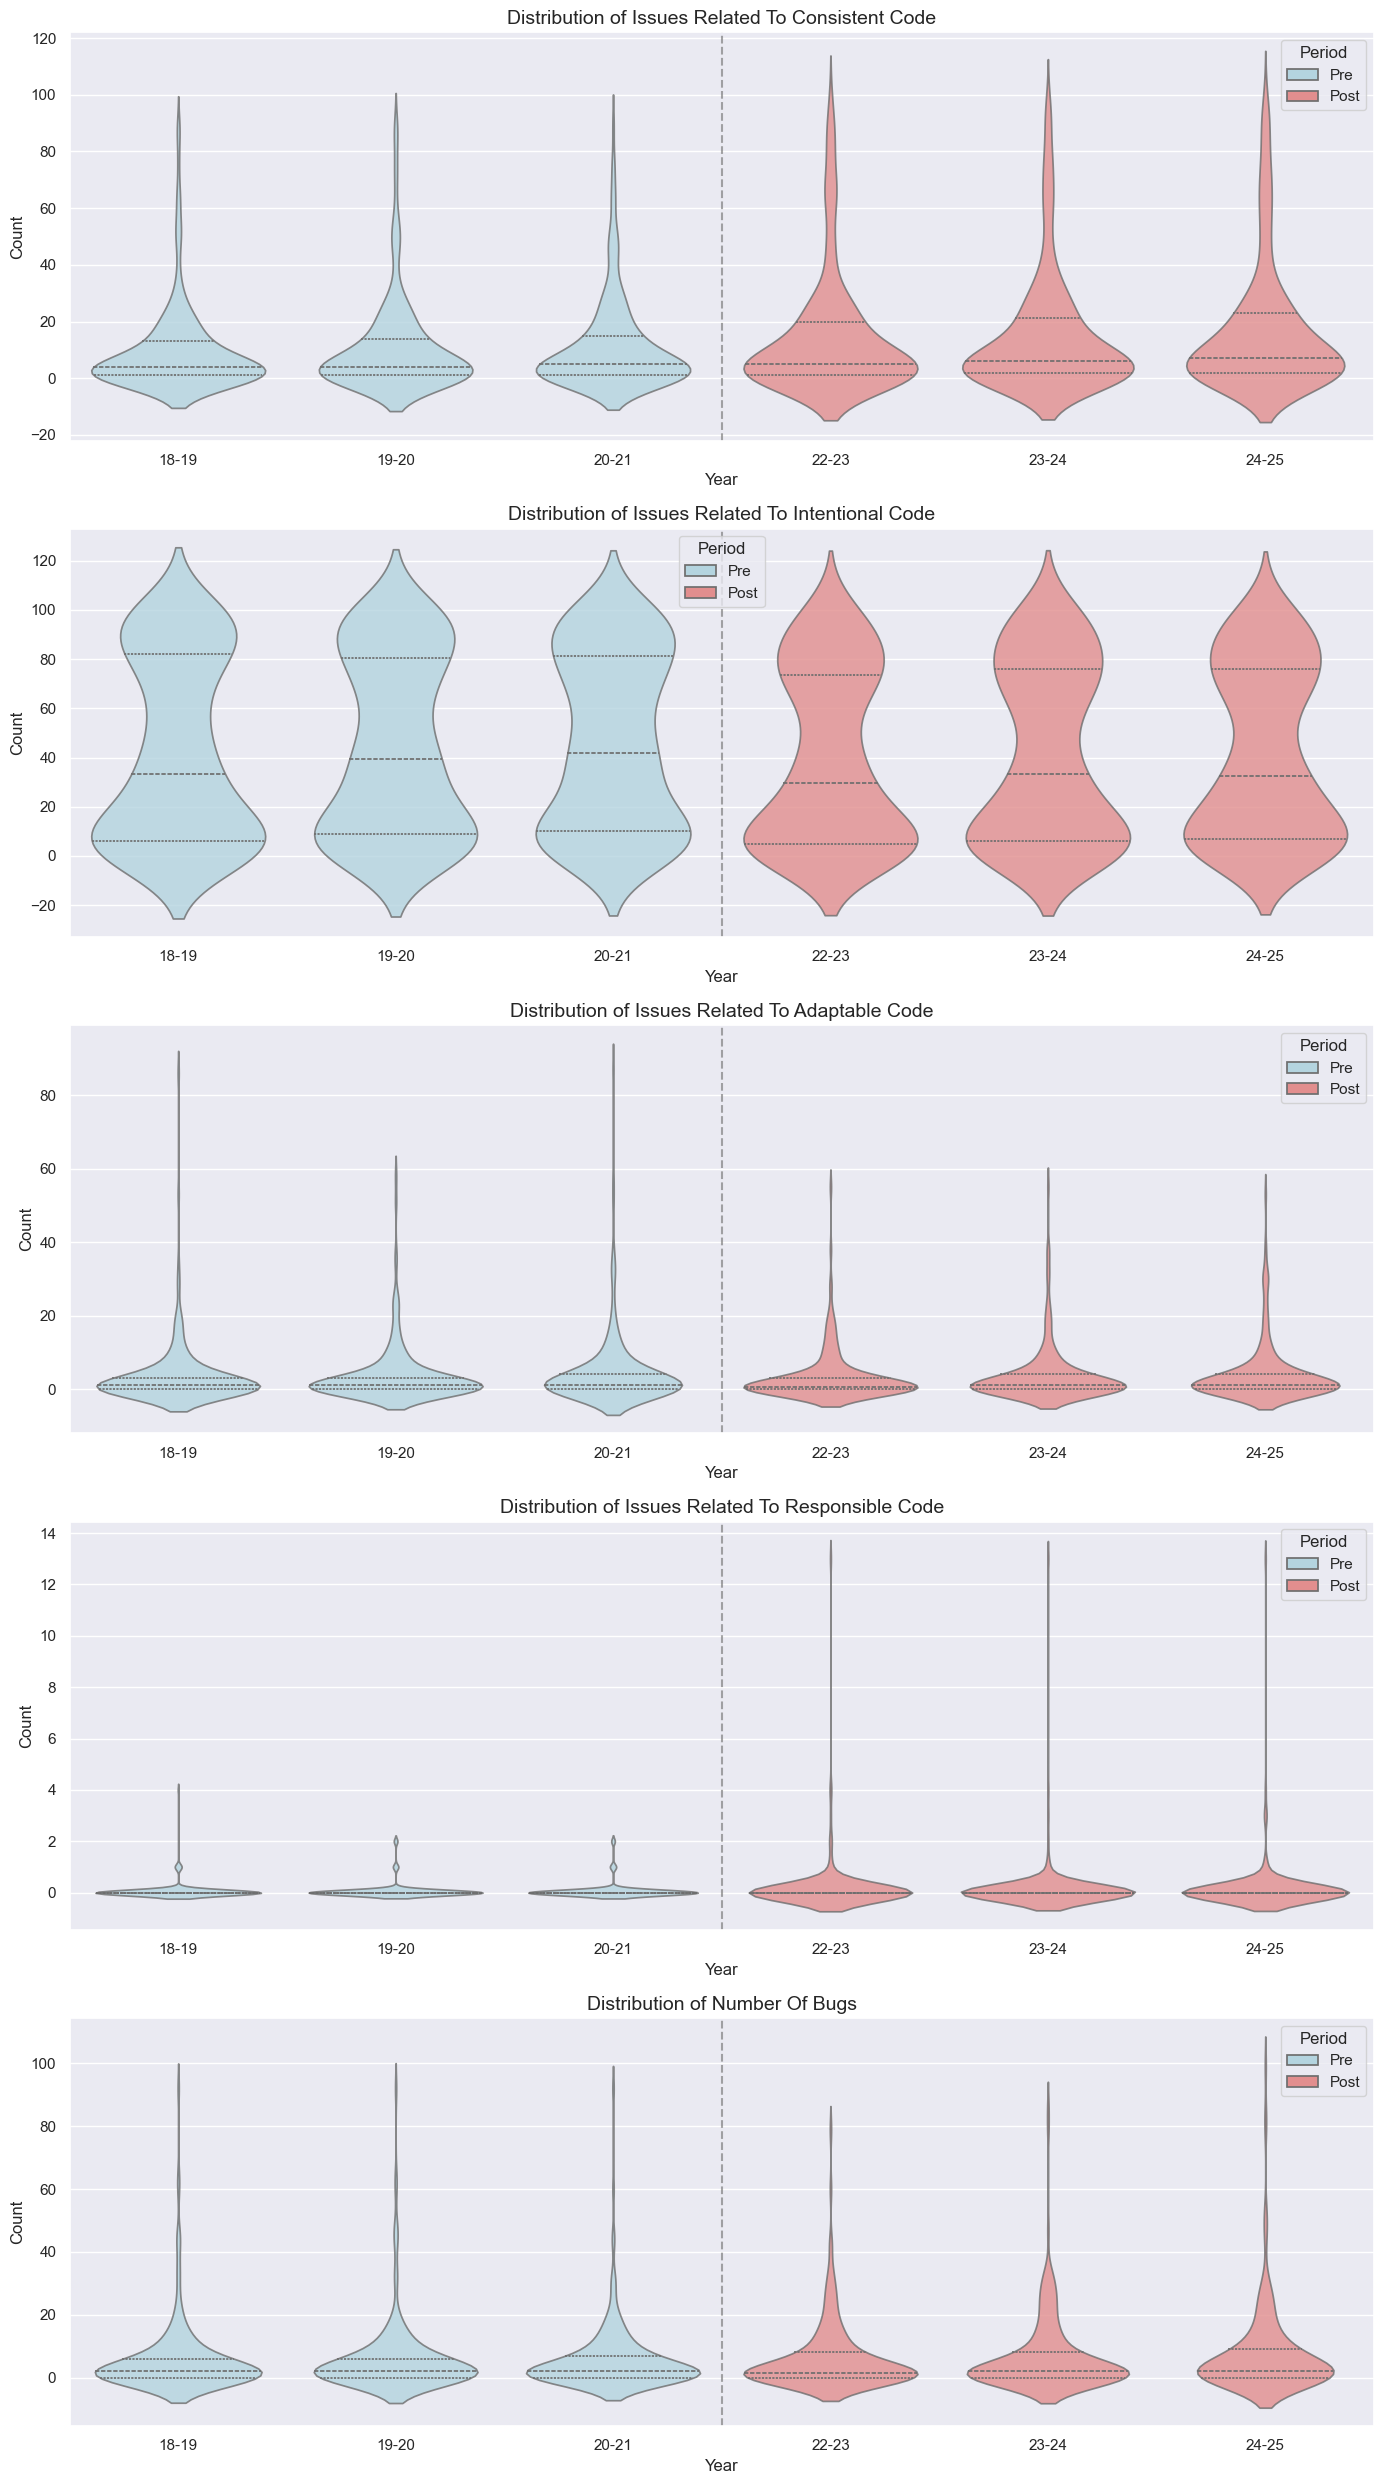

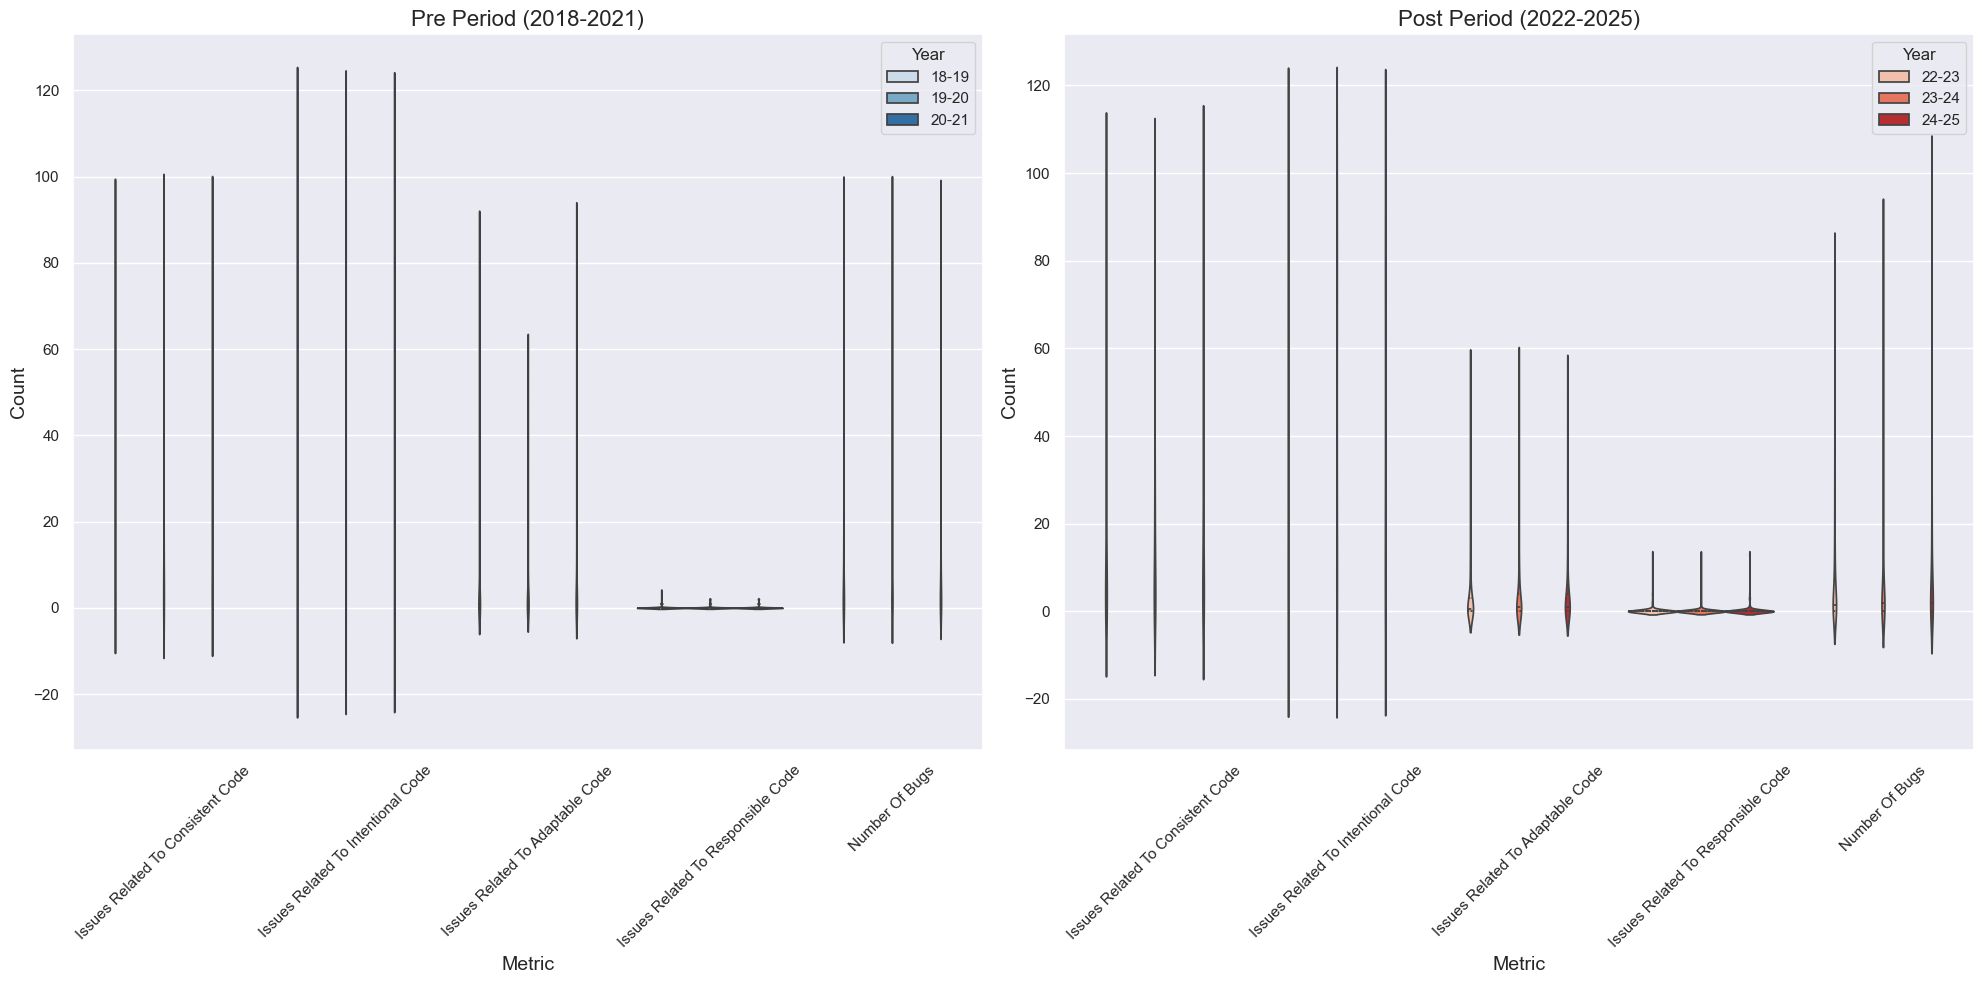

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Set the theme
sns.set_theme(style="darkgrid")

# Load the CSV files
pre_files = ['filtered data/pre_2019.csv', 'filtered data/pre_2020.csv', 'filtered data/pre_2021.csv']
post_files = ['filtered data/post_2023.csv', 'filtered data/post_2024.csv', 'filtered data/post_2025.csv']

pre_years = ['18-19', '19-20', '20-21']
post_years = ['22-23', '23-24', '24-25']

# Load and tag each dataframe with its year
dfs = []
for i, file in enumerate(pre_files):
    df = pd.read_csv(file)
    df['Period'] = 'Pre'
    df['Year'] = pre_years[i]
    dfs.append(df)

for i, file in enumerate(post_files):
    df = pd.read_csv(file)
    df['Period'] = 'Post'
    df['Year'] = post_years[i]
    dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(dfs)

# Columns to plot
columns = [
    'numberOfIssuesRelatedToConsistentCode',
    'numberOfIssuesRelatedToIntentionalCode', 
    'numberOfIssuesRelatedToAdaptableCode',
    'numberOfIssuesRelatedToResponsibleCode',
    'numberOfBugs'
]

# Better titles for each column
improved_titles = [
    'Issues Related To Consistent Code',
    'Issues Related To Intentional Code', 
    'Issues Related To Adaptable Code',
    'Issues Related To Responsible Code',
    'Number Of Bugs'
]

# Create violin plots for each column with pre/post side by side
fig, axes = plt.subplots(len(columns), 1, figsize=(14, 5*len(columns)))

for i, col in enumerate(columns):
    # Create the violin plot
    sns.violinplot(
        x="Year", 
        y=col, 
        hue="Period", 
        data=combined_df,
        palette={"Pre": "lightblue", "Post": "lightcoral"},
        split=False,
        inner="quartile",
        ax=axes[i]
    )
    
    # Use improved titles
    axes[i].set_title(f'Distribution of {improved_titles[i]}', fontsize=14)
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Period')
    
    # Add a vertical line between pre and post periods
    mid_point = 2.5  # Between index 2 and 3
    axes[i].axvline(x=mid_point, color='gray', linestyle='--', alpha=0.7)
    
    # Add mean line in each violin
    for violin in axes[i].collections:
        violin.set_alpha(0.8)

# Adjust layout
plt.tight_layout()
plt.show()

# Alternative: Create a figure with all metrics in one plot for each period
# This shows the comparison between metrics within each period
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Reshape data for this visualization
melted_df = pd.melt(
    combined_df, 
    id_vars=['Period', 'Year'], 
    value_vars=columns,
    var_name='Metric', 
    value_name='Count'
)

# Create a mapping from column names to improved titles
column_to_title = {col: title for col, title in zip(columns, improved_titles)}
melted_df['Metric'] = melted_df['Metric'].map(column_to_title)

# Pre period plot
sns.violinplot(
    x="Metric", 
    y="Count", 
    hue="Year",
    data=melted_df[melted_df['Period'] == 'Pre'],
    palette="Blues",
    split=False,
    inner="quartile",
    ax=axes[0]
)
axes[0].set_title('Pre Period (2018-2021)', fontsize=16)
axes[0].set_xlabel('Metric', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Year')

# Post period plot
sns.violinplot(
    x="Metric", 
    y="Count", 
    hue="Year",
    data=melted_df[melted_df['Period'] == 'Post'],
    palette="Reds",
    split=False,
    inner="quartile",
    ax=axes[1]
)
axes[1].set_title('Post Period (2022-2025)', fontsize=16)
axes[1].set_xlabel('Metric', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Year')

# Adjust layout
plt.tight_layout()
plt.show()

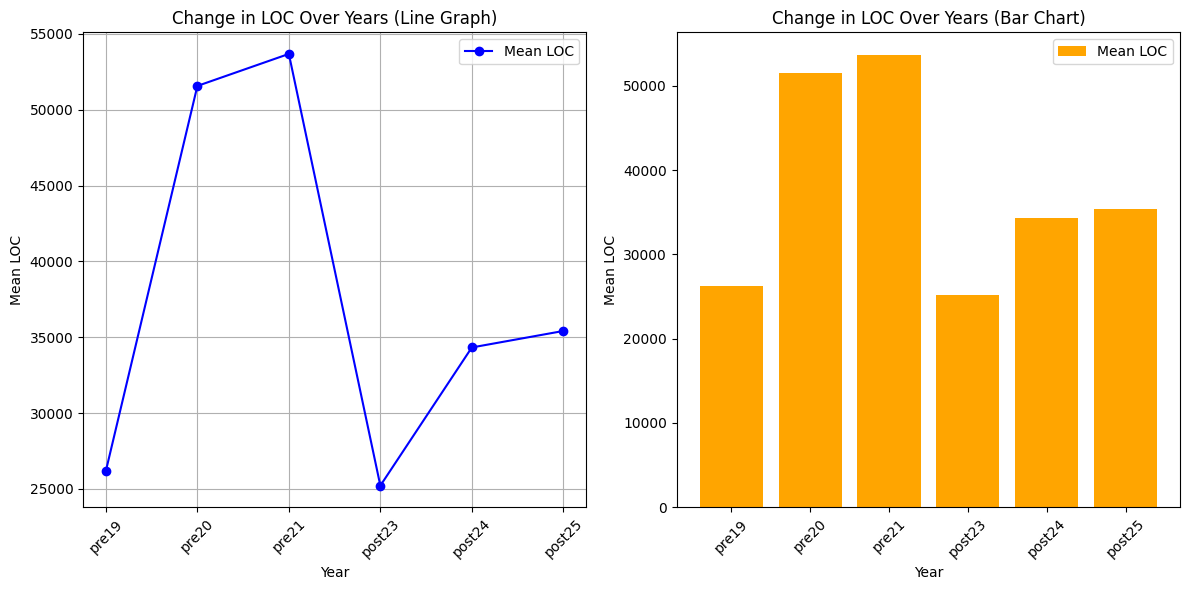

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_pre = pd.read_csv('filtered data/pre_loc.csv')
df_post = pd.read_csv('filtered data/post_loc.csv')

# Combine pre and post data into a single DataFrame
df_pre['Period'] = 'Pre'
df_post['Period'] = 'Post'
df_combined = pd.concat([df_pre, df_post])

# Melt the DataFrame to have years as a single column
df_melted = df_combined.melt(id_vars=['ProjectName', 'Period'], 
                             value_vars=['pre19', 'pre20', 'pre21', 'post23', 'post24', 'post25'],
                             var_name='Year', 
                             value_name='LOC')

# Aggregate data by year (calculate mean LOC for each year)
df_aggregated = df_melted.groupby('Year')['LOC'].mean().reset_index()

# Sort the years for proper ordering
df_aggregated['Year'] = pd.Categorical(df_aggregated['Year'], 
                                       categories=['pre19', 'pre20', 'pre21', 'post23', 'post24', 'post25'], 
                                       ordered=True)
df_aggregated = df_aggregated.sort_values('Year')

# Plotting
plt.figure(figsize=(12, 6))

# Line Graph
plt.subplot(1, 2, 1)
plt.plot(df_aggregated['Year'], df_aggregated['LOC'], marker='o', linestyle='-', color='b', label='Mean LOC')
plt.title('Change in LOC Over Years (Line Graph)')
plt.xlabel('Year')
plt.ylabel('Mean LOC')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Bar Chart
plt.subplot(1, 2, 2)
plt.bar(df_aggregated['Year'], df_aggregated['LOC'], color='orange', label='Mean LOC')
plt.title('Change in LOC Over Years (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Mean LOC')
plt.xticks(rotation=45)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Load the data
df_pre = pd.read_csv('filtered data/pre_loc.csv')
df_post = pd.read_csv('filtered data/post_loc.csv')

# Combine pre and post data into a single DataFrame
df_pre['Period'] = 'Pre'
df_post['Period'] = 'Post'
df_combined = pd.concat([df_pre, df_post])

# Melt the DataFrame to have years as a single column
df_melted = df_combined.melt(id_vars=['ProjectName', 'Period'], 
                             value_vars=['pre19', 'pre20', 'pre21', 'post23', 'post24', 'post25'],
                             var_name='Year', 
                             value_name='LOC')

# Function to convert year strings to actual years
def convert_year(year_str):
    if year_str.startswith('pre'):
        return int('20' + year_str[3:])  # Convert 'pre19' to 2019
    elif year_str.startswith('post'):
        return int('20' + year_str[4:])  # Convert 'post24' to 2024
    return year_str  # Fallback (should not happen)

# Apply the conversion to the 'Year' column
df_melted['Year'] = df_melted['Year'].apply(convert_year)

# Calculate summary statistics for each year
summary_stats = df_melted.groupby('Year')['LOC'].describe()

# Drop the 'min' column
summary_stats = summary_stats.drop(columns=['min'])

# Add the total LOC for each year
summary_stats['Total LOC'] = df_melted.groupby('Year')['LOC'].sum()

# Rename columns
summary_stats = summary_stats.rename(columns={
    'count': '# of projects',
    'mean': 'LOC mean',
    'std': 'LOC std',
    '25%': 'LOC 25%',
    '50%': 'LOC median',
    '75%': 'LOC 75%',
    'max': 'LOC max'
})

# Round all numeric values to 2 decimal places
summary_stats = summary_stats.round(2)

# Format the DataFrame to remove .0 for whole numbers
def format_value(x):
    if isinstance(x, (int, float)):
        return int(x) if x == int(x) else x
    return x

summary_stats = summary_stats.applymap(format_value)

# Display the customized summary statistics table
print("Customized Summary Statistics of LOC by Year:")
summary_stats

# Optional: Save the table to a CSV file
# summary_stats.to_csv('customized_loc_summary_statistics.csv')

Customized Summary Statistics of LOC by Year:


C:\Users\abdec\AppData\Local\Temp\ipykernel_29732\330883897.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_stats = summary_stats.applymap(format_value)


,# of projects,LOC mean,LOC std,LOC 25%,LOC median,LOC 75%,LOC max,Total LOC
Year,,,,,,,,
2019,200,26195.82,97790.11,263.5,1889.5,11639.25,1048760,5239163
2020,200,51563.71,303316.50,326.5,2257.0,13263.25,4032185,10312742
2021,200,53673.10,303513.53,353.0,2520.5,13855.25,4032185,10734620
2023,200,25220.14,79307.74,266.0,1508.5,14039.25,772408,5044027
2024,200,34327.54,97096.35,421.0,2059.5,16486.50,772408,6865509
2025,200,35413.43,98239.77,434.0,2590.5,19250.25,772408,7082686
